# PCA IRIS Ejemplo
**Developer:** Alexander O. Valdez Portocarrero\
Ing. Electronico.

## Pruebas y ejemplos

### 1. Cargamos los datos IRIS 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2. Estandarizamos la data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x= df.loc[:,features].values

In [11]:
#x

In [12]:
y=df.loc[:,['Species']].values

In [15]:
#y

In [16]:
# AQUI USAMOS LA ESTANDARIZACION
x=StandardScaler().fit_transform(x)

In [18]:
x[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

### 3. PCA PROYECCION 2D

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca =PCA(n_components=2)

In [21]:
principalComponents= pca.fit_transform(x)

In [22]:
principal_df= pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])

In [23]:
principal_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [24]:
finalDf= pd.concat([principal_df,df[['Species']]],axis=1)

In [25]:
finalDf


,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


### 4.VISUALIZANDO 2D PROYECCION

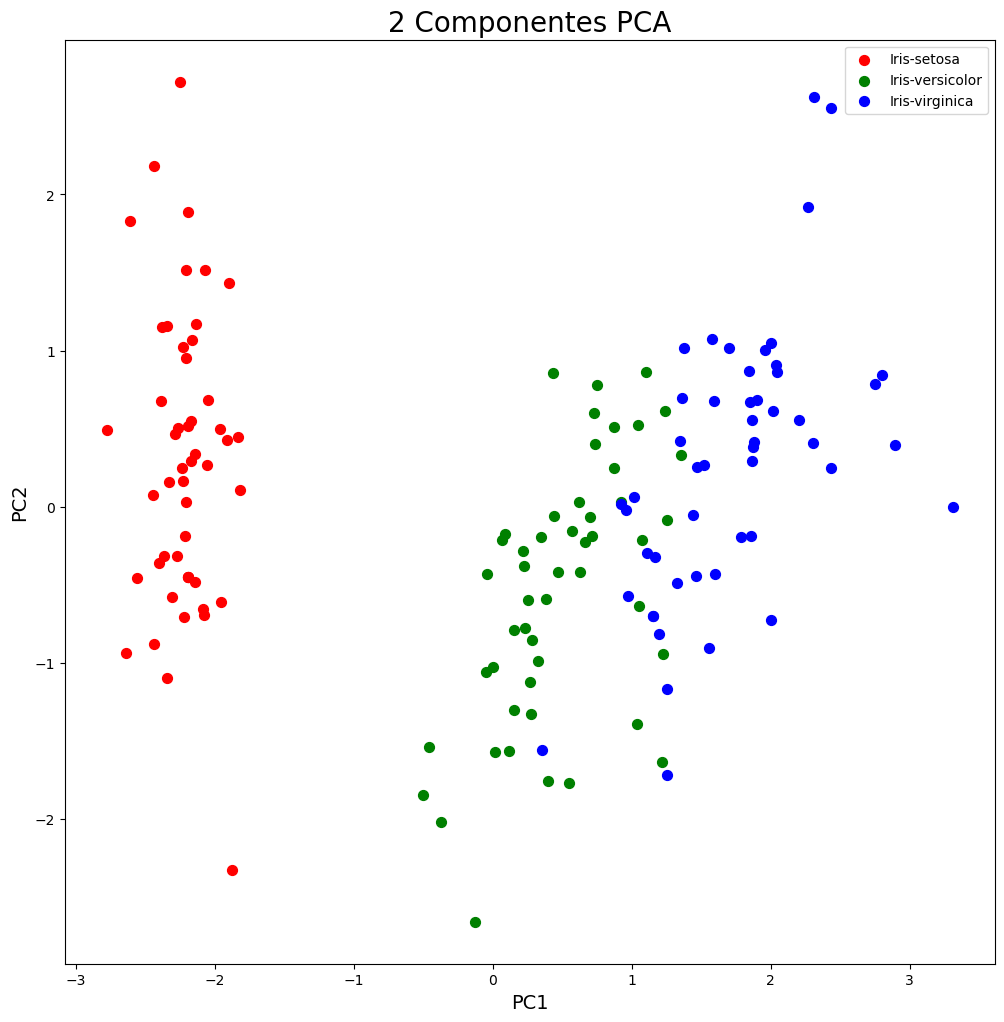

In [29]:
fig = plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=14)
ax.set_ylabel('PC2',fontsize=14)
ax.set_title("2 Componentes PCA",fontsize=20)

targets= ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']

for target, color in zip(targets,colors):
    i2Keep =  finalDf['Species']==target
    ax.scatter(finalDf.loc[i2Keep,'PC1']
                ,finalDf.loc[i2Keep,'PC2']
                ,c=color
                ,s=50)
                
ax.legend(targets)

### EXPLAINED VARIANCE
La explicacion de la variance nos idice cuanta informacion(varianza)puede ser atribuida a cada componente princial. Esto es importante porque mientras tu puedes convertir un espacio dimensional de 4 a un espacio dimensional de 2 dimensiones se pierde algo de la variance(Information) cuando se realiza este procedimeinto.
Al usar el atributo **explained_variance_ratio_**, podemos apreciar que la componente principal PC1 ctoniene 72.77 porciento de la variance y la segunda compoenten principal contien 23.03 porciento de la varianza. Juntas las 2 componentes cotienen 95.8 porciento de la informacion.

In [30]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])